In [2]:
from basic_tools import *
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
h2_total=pd.read_csv(h2_total_par_filtered_path,index_col='phenotype')
h2_total.shape

(497, 7602)

# Parsing result of partitioned LDSC

In [4]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()

In [5]:
regression_result_bp_list_dict=dict([make_regression_result_list(h2_total,phenotype,suffix_bp_list_power) for phenotype in phenotypes_par_filtered.index])

In [6]:
h2_bp8_df=pd.DataFrame([[phenotype]+(regression_result_list[-1]['h2']/regression_result_list[-1]['h2'].sum()).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_bp8_df=h2_bp8_df.set_index(0)

In [7]:
def absorb_negative(array):
    array=np.array(array)
    for i in range(len(array)):
        if array[i]<0:
            if i<len(array)-1:
                array[i+1]=array[i+1]+array[i]
                array[i]=0
            else:
                array[i]=0
    return array

In [8]:
def regression_result_groupchr(regression_result):
    regression_result_temp=regression_result.copy()
    regression_result_temp['h2_ratio']=regression_result_temp['h2']/regression_result_temp['h2'].sum()
    regression_result_temp['chr']=regression_result_temp['category'].apply(lambda x:category_to_format(x,'chr'))
    regression_result_temp_chr=dict([(idx,regression_result_temp.loc[value]) for idx,value in regression_result_temp.groupby('chr').groups.items()])    
    return regression_result_temp_chr

In [9]:
plt.rcParams['font.family']='Arial'

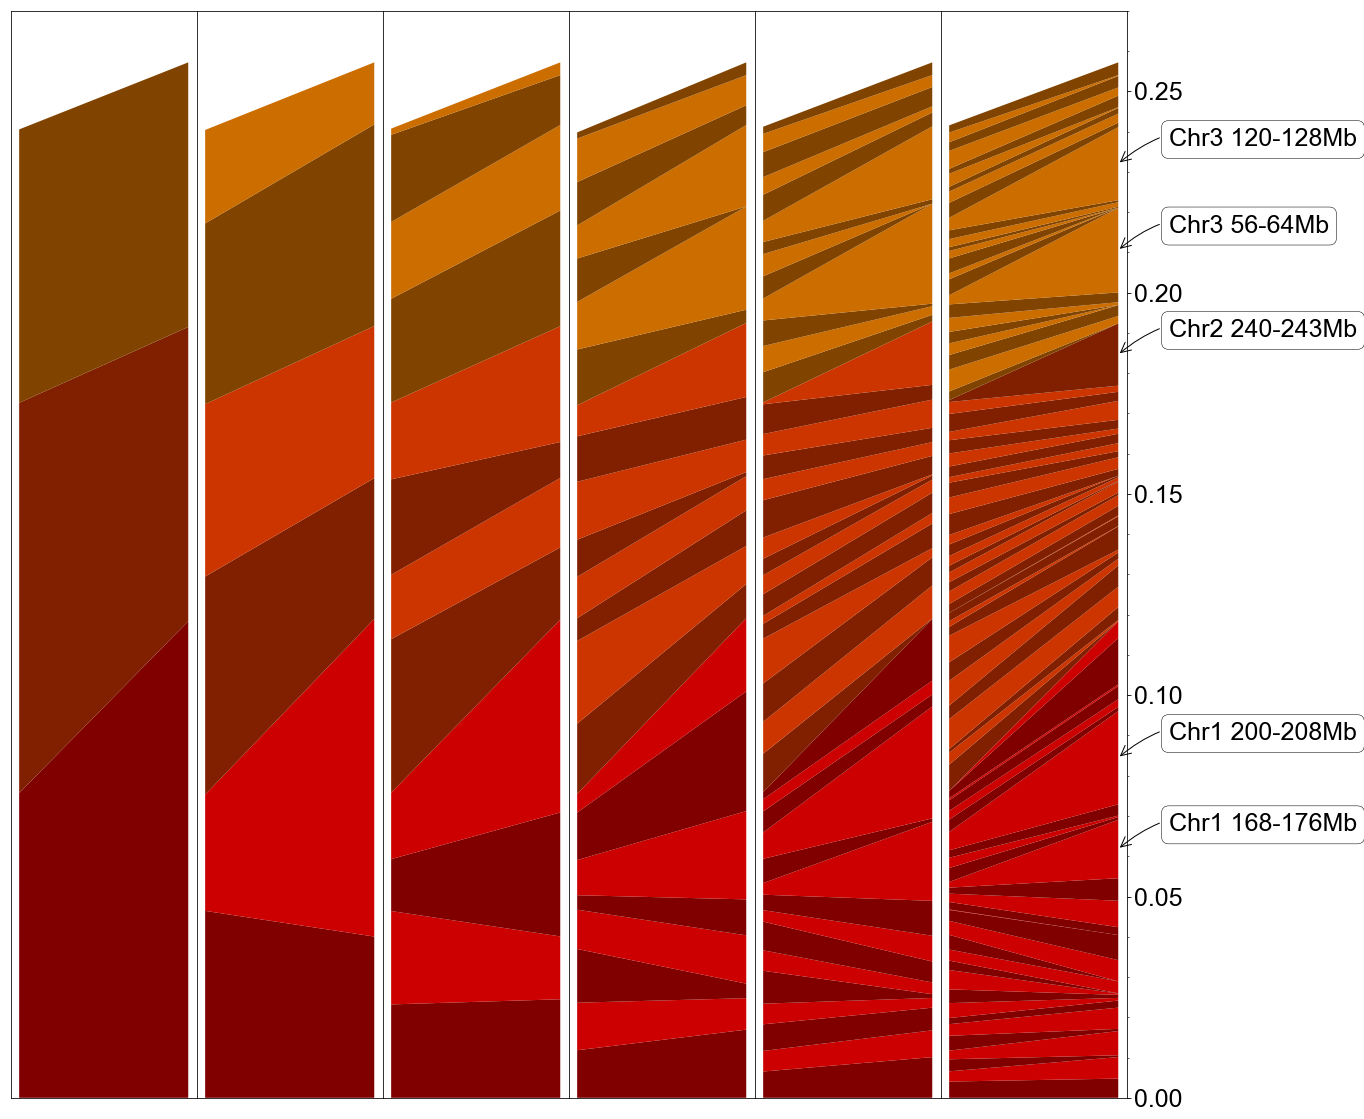

In [16]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams["font.size"] = 25

import matplotlib.ticker as ticker
def plot_alluvial(phenotype_list,regression_result_list_dict,chr_list,absorb=True):
    regression_result_list_list=[regression_result_list_dict[phenotype].copy() for phenotype in phenotype_list]
    regression_result_chrdict_list_list=[[regression_result_groupchr(regression_result) for regression_result in regression_result_list] for regression_result_list in regression_result_list_list]
    
    fig = plt.figure()
    
    for scale_idx in range(len(regression_result_chrdict_list_list[0])):#for each scale

            
        df_data=pd.concat([pd.concat([regression_result_chrdict_list_list[pheno_idx][scale_idx][chrN]['h2_ratio'] for pheno_idx in range(len(phenotype_list))],axis=1) for chrN in chr_list])
        df_index=pd.concat([regression_result_chrdict_list_list[0][scale_idx][chrN]['category'] for chrN in chr_list])
        df_columns=phenotype_list
        df=pd.DataFrame(df_data);df.columns=df_columns;df.index=df_index
        df=df.apply(absorb_negative)
        df_colors=[]
        
        for chrN in chr_list:
            color_list=[np.array(plt.cm.get_cmap('hsv')((chrN-1)/22))[:-1]*0.5,np.array(plt.cm.get_cmap('hsv')((chrN-1)/22))[:-1]*0.8]
            cnt=0;
            for cat in df[df.index.map(lambda x: category_to_format(x,'chr'))==chrN].index:
                df_colors.append(color_list[cnt])
                cnt=(cnt+1)%2


        #ax.set_prop_cycle(color=color_list)
        ax1 = fig.add_subplot(1, len(regression_result_chrdict_list_list[0]), scale_idx+1)
        ax1.stackplot(df.columns.map(code_to_description),df,colors=df_colors)
        #ax1.set_yticks([])
        #ax1.annotate('sss',(1,1))
        
        if scale_idx==len(regression_result_chrdict_list_list[0])-1:
            #for idx,row in df[df]
            #print(df.applymap(lambda x: x if x>0.001 else np.nan).sum(axis=1)>0)
            #print(df)
            #print(df.applymap(lambda x: x if x>5/regression_result_list_list[0][scale_idx].shape[0] else np.nan))
            for idx in df.loc[df.applymap(lambda x: x if x>5/regression_result_list_list[0][scale_idx].shape[0] else np.nan).sum(axis=1)>0].index:
                #plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.7), ec="black", lw=0.5))
                #print(idx)
                #print(1/regression_result_list_list[0][scale_idx].shape[0])
                xy=np.array([1,df.iloc[:,-1].loc[:idx].sum()-df.iloc[:,-1].loc[idx]/2])
                xytext=xy+(0.3,0.006)
                #print(xy)
                ax1.annotate(category_to_format(idx,'chr_bp')+'Mb',
                            xy=xy, xycoords='data',
                            xytext=xytext, textcoords='data',
                            horizontalalignment='left',
                            verticalalignment='center',
                            arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"), 
                            bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.7), ec="black", lw=0.5),
                            fontsize=25)
            ax1.yaxis.tick_right()
            ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
            #ax1.yaxis.set_label_position("right")
            #ax1.yaxis.set_ticks_position('both')
        else:
            ax1.set_yticks([])
            #ax1.
            
        #plt.show()
            #print(a)
        #plt.grid(True,linewidth=0.4)
        plt.subplots_adjust(wspace = 0)
        plt.xticks([], [])
        #plt.axis('off')
        """
        data=regression_result_chr['h2_ratio']#*(1-middle_interval_ratio)
        if absorb:
            data=absorb_negative(data)
        color_list=[np.array(plt.cm.get_cmap('hsv')((chrN-1)/22))[:-1]*0.5,np.array(plt.cm.get_cmap('hsv')((chrN-1)/22))[:-1]*0.8]
        """
                    
                    

plot_alluvial(['23115_irnt','30100_irnt'],regression_result_bp_list_dict,[1,2,3])

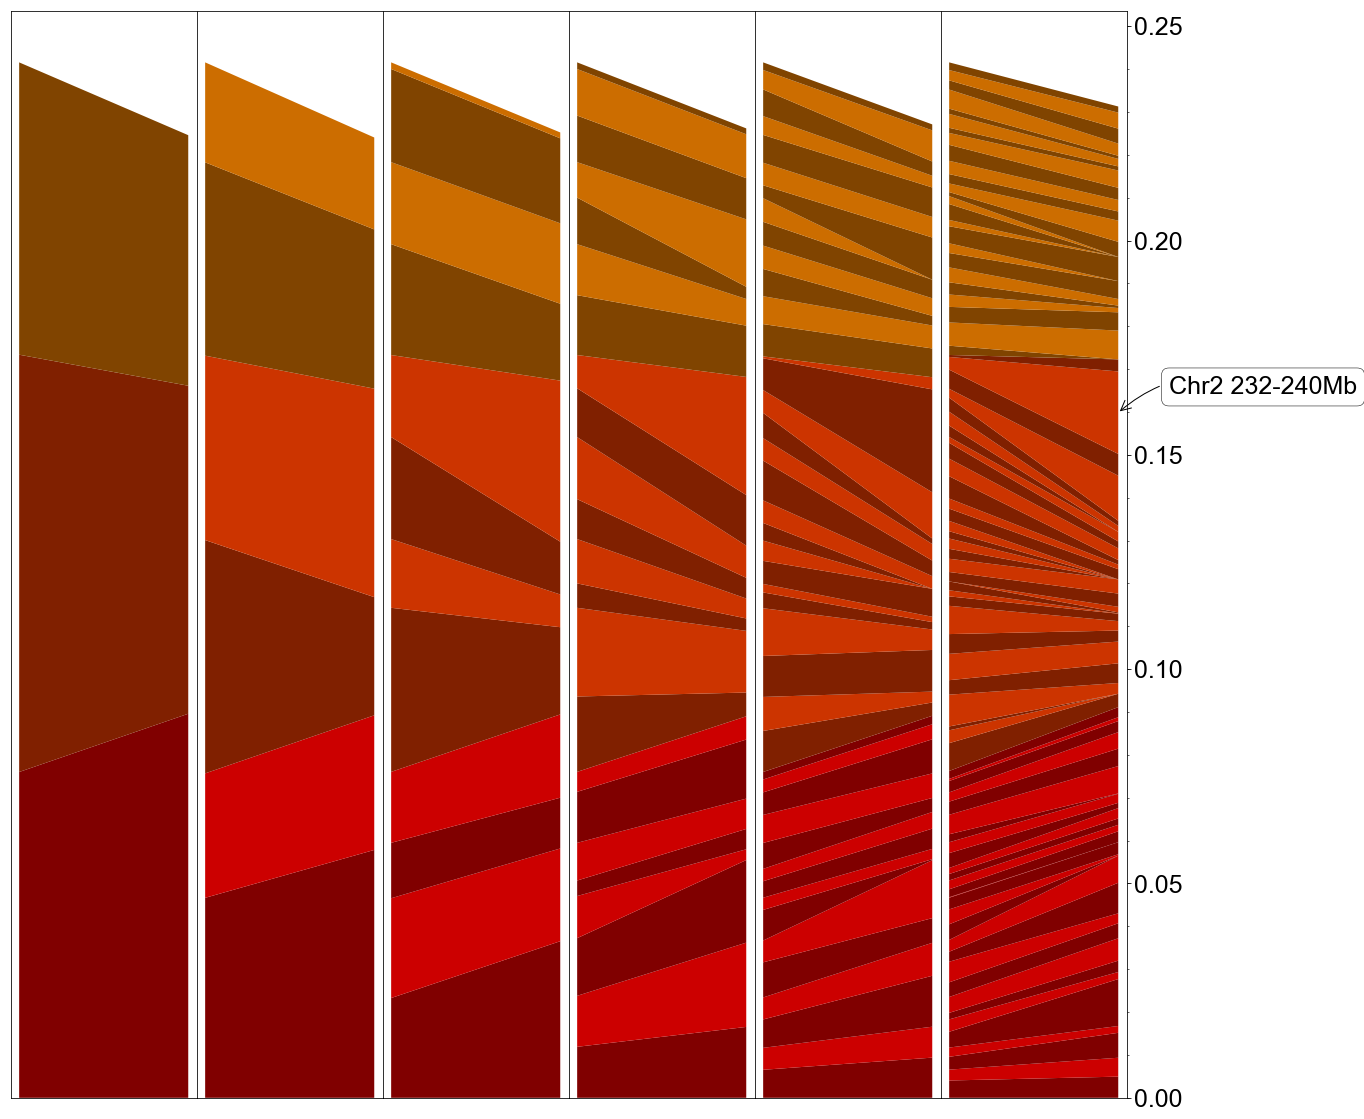

In [17]:
plot_alluvial(['23115_irnt','5132_irnt'],regression_result_bp_list_dict,[1,2,3])               

In [12]:
def plot_stacked_ratio(pheno_code_list,idx,regression_result_list_dict,regression_result_list_dummy,variance_df=None,absorb=False):
    #http://blog.robofied.com/index.php/area-plot-and-stack-plot/
    #https://python-graph-gallery.com/13-percent-stacked-barplot/
    plt.rcParams["figure.figsize"] = (5,15)
    plt.rcParams["font.size"] = (10)
    prop_list=[]
    for pheno_code in pheno_code_list:
        if pheno_code=='dummy':
            prop=regression_result_list_dummy[idx]['h2']/regression_result_list_dummy[idx]['h2'].sum()
        else:
            prop=regression_result_list_dict[pheno_code][idx]['h2']/regression_result_list_dict[pheno_code][idx]['h2'].sum()
            if absorb:
                for i in prop.index:
                    if prop[i]<0:
                        if i<prop.index[-1]:
                            prop[i+1]=prop[i+1]+prop[i]
                            prop[i]=0
                        else:
                            prop[i]=0
                prop=prop/prop.sum()
                """
                for i in prop.index[::-1]:
                    if prop[i]<0 and i>0:
                        prop[i-1]=prop[i-1]+prop[idx2]
                        prop[i]=0
                """
            #prop=prop/prop.sum()
        prop_list.append(prop)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    plt.title("stacked proportion of h2")
    plt.xlabel("phenotypes")
    plt.ylabel("cumulative proportion of h2")
    #x.set_prop_cycle(color=['red', 'green'])
    ax.stackplot(pheno_code_list, pd.DataFrame(prop_list).T ,labels=regression_result_list_dict['23115'][idx]['category'])
    
    plt_text='pheno_code(description)    (h2,h2_pval)   (corr_dummy(cm8), neg_categories(cm64-cm32-cm16-cm8))\n'
    for pheno_code in pheno_code_list:
        if pheno_code!='dummy':
            plt_text+=("{}({})".format(pheno_code,h2_total['description'][pheno_code].split(':')[-1]))
            if variance_df is not None:
                plt_text+=("     ({:.3f}, {:.3f})".format(variance_df.loc[pheno_code]['h2'],variance_df.loc[pheno_code]['log10_pval']))
                plt_text+=(" ({:.3f}, {:d}-{:d}-{:d}-{:d})".format(variance_df.loc[pheno_code]['cm8'],variance_df.loc[pheno_code]['cm64_negative_categories'],variance_df.loc[pheno_code]['cm32_negative_categories'],variance_df.loc[pheno_code]['cm16_negative_categories'],variance_df.loc[pheno_code]['cm8_negative_categories']))
            plt_text+='\n'
    #corr_with_dummy['h2']=corr_with_dummy.index.map(lambda x: h2_total['myuni.Total Observed scale h2'][x])
    #corr_with_dummy['log10_pval']=corr_with_dummy.index.map(lambda x: np.log10(st.norm.sf(h2_total['myuni.Total Observed scale h2'][x]/h2_total['myuni.Total Observed scale h2_se'][x])))                      
                      #Code: "+pheno_code+"\n"+h2_total['atlas.description'][pheno_code]+"\n\n")
    #plt_text+="h2={}\nlog10(pval)={:.2f}\n".format(h2_total['myuni.Total Observed scale h2'][pheno_code],np.log10(pval))
    #plt_text+="Total={:,}\nCase={:,} Control={:,}".format(h2_total['neale.N'][pheno_code],h2_total['neale.N_case'][pheno_code],h2_total['neale.N_control'][pheno_code])
    #plt.text(x=0,y=0,s=plt_text, fontsize=20,color='k',horizontalalignment='center', verticalalignment='center')
    #plt_text="Total h2={} pval={}\n".format(h2_total['myuni.Total Observed scale h2'][pheno_code],pval)
    #plt_text+="Total={} Case={} Control={}".format(h2_total['neale.N'][pheno_code],h2_total['neale.N_case'][pheno_code],h2_total['neale.N_control'][pheno_code])
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0, -0.1,plt_text,fontsize=10,verticalalignment='top', bbox=props)
    #plt.text(x=0,y=0,s=plt_text, fontsize=20,color='k',horizontalalignment='center', verticalalignment='center')
    
    
    plt.legend(loc='upper left', bbox_to_anchor=(1.4, 1), fontsize=8,fancybox=True, shadow=True)
    plt.show()
    
    
    
    
plot_stacked_ratio(['50','20002_1462'],2,regression_result_cm_list_dict,regression_result_cm_list_dummy_dict['snp'],absorb=True)
#plot_stacked_ratio(['20002_1466','dummy','2188'],3,regression_result_list_dict,regression_result_list_dummy,corr_with_dummy)

NameError: name 'regression_result_cm_list_dict' is not defined

In [ ]:
plt.stackplot([1,2,3],[[1,2,3]],[1,2,3])
plt.stackplot([1,2,3],[[3,2,3]],[1,2,3])

In [ ]:
import urllib, json
import plotly.graph_objects as go

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label']
  ))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()

In [ ]:
def plot_par_pie(regression_result_list,middle_interval_ratio=0.1,top_interval_ratio=0.05,absorb=True,reverse_order=True):
    plt.rcParams["figure.figsize"] = (15,15)
    size =0.3

    
    regression_result_list=regression_result_list.copy()[::-1] if reverse_order else regression_result_list.copy()
        
    regression_result_ref=regression_result_list[0].copy()
    regression_result_ref['h2_ratio']=regression_result_ref['h2']/regression_result_ref['h2'].sum()
    regression_result_ref['chr']=regression_result_ref['category'].apply(lambda x:category_to_format(x,'chr'))

    regression_result_chrdict_list=[regression_result_groupchr(regression_result) for regression_result in regression_result_list]
        
    fig, ax = plt.subplots()
    #fig = plt.figure()
    #ax = fig.add_subplot(111, polar=True)
    
    r_big=np.linspace(1, 1.07, 1000)
    r_small=np.linspace(1, 1.03, 1000)
    #r_middle=np.linspace(1, 1.04, 1000)
    
    for idx,ratio in enumerate(np.arange(0, 1.0001, 0.01)):
        theta=np.pi/2-2*np.pi*(1-top_interval_ratio)*ratio
        if idx%10==0:
            x=r_big*np.cos(theta)
            y=r_big*np.sin(theta)
            plt.plot(x, y,color='grey',linewidth=1);
            
            plt.text(1.03*x[-1],1.03*y[-1],'{:.0f}'.format(ratio*100),color='grey',rotation=180/np.pi*(+theta-np.pi/2),horizontalalignment='center',verticalalignment='center')
        else:
            x=r_small*np.cos(theta)
            y=r_small*np.sin(theta)
            
            plt.plot(x, y,color='grey',linewidth=1);
    plt.pie([1-top_interval_ratio],radius=r_big[-1],colors=[(1,1,1,1)],startangle=90,counterclock=False,wedgeprops=dict(width=size, edgecolor='grey'))
    #centre_circle = plt.Circle((0,0),r_big[-1],fc=(1,1,1,0),edgecolor='grey')#,', fc='white',linewidth=1,edgecolor='grey')
    
    #fig.gca().add_artist(centre_circle)
            
            
    r_chr_annot=np.linspace(1, 1.13, 1000)
    for idx,regression_result_chrdict in enumerate(regression_result_chrdict_list):#for each scale
        for chrN,regression_result_chr in regression_result_chrdict.items():#for each chromosome
            data=regression_result_chr['h2_ratio']*(1-middle_interval_ratio)
            if absorb:
                data=absorb_negative(data)
            startangle=90.0-360.0*middle_interval_ratio/len(regression_result_chrdict.keys())*(chrN-1)-360.0*regression_result_ref[regression_result_ref['chr']<chrN]['h2_ratio'].sum()*(1-middle_interval_ratio)
            
            data=data*(1-top_interval_ratio)
            startangle=startangle*(1-top_interval_ratio)+90*top_interval_ratio
            radius=1-(1-0.4)/(len(regression_result_list)-1)*idx
            #startangle=startangle+360*top_interval_ratio
            color_list=[np.array(plt.cm.get_cmap('hsv')((chrN-1)/22))[:-1]*0.5,np.array(plt.cm.get_cmap('hsv')((chrN-1)/22))[:-1]*0.8]
            
            if idx==0:                
                theta=startangle/180*np.pi-2*np.pi*data.sum()
                x=r_chr_annot*np.cos(theta)
                y=r_chr_annot*np.sin(theta)
                plt.plot(x, y,color=color_list[0],linewidth=1);
                plt.text(1.05*x[-1],1.05*y[-1],chrN,rotation=180/np.pi*(+theta-np.pi/2),color=color_list[0],fontsize=plt.rcParams['font.size']*1.3,horizontalalignment='center')
                #plt.text(r_big[-1]*np.cos(theta),r_big[-1]*np.sin(theta),chrN,rotation=180/np.pi*(+theta-np.pi/2))
                
            
            ax.set_prop_cycle(color=color_list)
            plt.pie(data,radius=radius,startangle=startangle,counterclock=False,wedgeprops=dict(width=size, edgecolor='w'))
        
        plt.pie([top_interval_ratio],radius=radius,colors=[(0.7,0.7,0.7,1)],startangle=90,counterclock=True,wedgeprops=dict(width=size, edgecolor='w'))

        radius=1-(1-0.4)/(len(regression_result_list)-1)*(idx+0.5)
        theta=np.pi/2+np.pi*top_interval_ratio
        text=category_to_format(regression_result_list[idx]['category'][0],mode='scale')
        text='Chr' if text==300 else str(text)+"Mb"
        fontsize=plt.rcParams['font.size']
        plt.text(radius*np.cos(theta),radius*np.sin(theta),text,rotation=180/np.pi*(+theta-np.pi/2),color='black',fontsize=fontsize,horizontalalignment='center',verticalalignment='center')

    
    centre_circle = plt.Circle((0,0),0.4-(1-0.4)/(len(regression_result_list)-1),color='black', fc='white',linewidth=1,edgecolor='grey')
    #fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    ax.set_xticks(np.pi/180. * np.linspace(180,  -180, 8, endpoint=False))
    plt.axis('equal')
    plt.tight_layout()
    
plot_par_pie(regression_result_bp_list_dict['23115_irnt'],middle_interval_ratio=0.0,top_interval_ratio=0.03)